## Carga de datos

In [1]:
import pandas as pd

In [2]:
predicted_sql = pd.read_json('results/predicted_sql_zero_shot.json', orient='records')
ground_truth = pd.read_json('bird_db/ground_truth.json', orient='records')

In [3]:
predicted_sql.head()

,question_id,gemini_1.5_Flash,chatgpt_4mini
0,721,SELECT COUNT(DISTINCT superhero.id) AS num_sup...,SELECT COUNT(*) FROM superhero WHERE eye_colou...
1,777,SELECT gender.gender FROM superhero JOIN gende...,SELECT g.gender FROM superhero s JOIN gender g...
2,731,SELECT COUNT(DISTINCT superhero.id) AS num_dc_...,SELECT COUNT(*) FROM superhero WHERE publisher...
3,759,SELECT colour.colour FROM superhero JOIN colou...,SELECT eye_colour_id FROM superhero ORDER BY w...
4,837,SELECT hero_id FROM hero_attribute JOIN attrib...,SELECT hero_id FROM hero_attribute ORDER BY at...


In [4]:
ground_truth.head()

,question_id,ground_truth,difficulty
0,717,SELECT T3.power_name FROM superhero AS T1 INNE...,simple
1,718,SELECT COUNT(T1.hero_id) FROM hero_power AS T1...,simple
2,719,SELECT COUNT(T1.id) FROM superhero AS T1 INNER...,moderate
3,720,SELECT DISTINCT T1.full_name FROM superhero AS...,simple
4,721,SELECT COUNT(T1.id) FROM superhero AS T1 INNER...,simple


In [5]:
zero_shot = pd.merge(predicted_sql, ground_truth, on='question_id')
zero_shot = zero_shot.sort_values(by='question_id').reset_index(drop=True)

In [6]:
zero_shot.head()

,question_id,gemini_1.5_Flash,chatgpt_4mini,ground_truth,difficulty
0,717,SELECT superpower.power_name FROM superhero JO...,SELECT sp.power_name FROM superpower sp JOIN h...,SELECT T3.power_name FROM superhero AS T1 INNE...,simple
1,718,SELECT COUNT(*) FROM superhero JOIN hero_power...,SELECT COUNT(DISTINCT hp.hero_id) AS superhero...,SELECT COUNT(T1.hero_id) FROM hero_power AS T1...,simple
2,719,SELECT COUNT(*) FROM superhero s JOIN hero_pow...,SELECT COUNT(DISTINCT s.id) AS super_strength_...,SELECT COUNT(T1.id) FROM superhero AS T1 INNER...,moderate
3,720,SELECT superhero.full_name FROM superhero JOIN...,SELECT s.full_name FROM superhero s JOIN hero_...,SELECT DISTINCT T1.full_name FROM superhero AS...,simple
4,721,SELECT COUNT(DISTINCT superhero.id) AS num_sup...,SELECT COUNT(*) FROM superhero WHERE eye_colou...,SELECT COUNT(T1.id) FROM superhero AS T1 INNER...,simple


## Resultados

In [55]:
import tests

db_path = 'bird_db/superhero.sqlite'

## Zero-Shot

In [52]:
predicted_sql = pd.read_json('results/predicted_sql_zero_shot.json', orient='records')
ground_truth = pd.read_json('bird_db/ground_truth.json', orient='records')
zero_shot = pd.merge(predicted_sql, ground_truth, on='question_id')
zero_shot = zero_shot.sort_values(by='question_id').reset_index(drop=True)

In [53]:
metricas_gemini_1 = tests.mostrar_metricas(zero_shot, 'gemini_1.5_Flash', db_path) 
metricas_chatgpt_1 = tests.mostrar_metricas(zero_shot, 'chatgpt_4mini', db_path) 

Model: gemini_1.5_Flash
-------------------------------
EX:	55.81 %
VA:	97.67 %
VES:	55.21 %
EM:	 6.20 %
Model: chatgpt_4mini
-------------------------------
EX:	51.16 %
VA:	99.22 %
VES:	51.55 %
EM:	 4.65 %


## Zero-Shot with hint

In [54]:
predicted_sql = pd.read_json('results/predicted_sql_zero_shot_hint.json', orient='records')
ground_truth = pd.read_json('bird_db/ground_truth.json', orient='records')
zero_shot_hint = pd.merge(predicted_sql, ground_truth, on='question_id')
zero_shot_hint = zero_shot_hint.sort_values(by='question_id').reset_index(drop=True)

In [27]:
metricas_gemini_2 = tests.mostrar_metricas(zero_shot_hint, 'gemini_1.5_Flash', db_path)
metricas_chatgpt_2 = tests.mostrar_metricas(zero_shot_hint, 'chatgpt_4mini', db_path) 

Model: gemini_1.5_Flash
-------------------------------
EX:	73.64 %
VA:	90.70 %
VES:	75.84 %
EM:	 4.65 %
Model: chatgpt_4mini
-------------------------------
EX:	81.40 %
VA:	100.00 %
VES:	83.02 %
EM:	 4.65 %


## Few-Shot


In [93]:
predicted_sql = pd.read_json('results/predicted_sql_few_shot.json', orient='records')
ground_truth = pd.read_json('bird_db/ground_truth.json', orient='records')
few_shot = pd.merge(predicted_sql, ground_truth, on='question_id')
few_shot = few_shot.sort_values(by='question_id').reset_index(drop=True)

In [94]:
metricas_gemini_3 = tests.mostrar_metricas(few_shot, 'gemini_1.5_Flash', db_path) 
metricas_chatgpt_3 = tests.mostrar_metricas(few_shot, 'chatgpt_4mini', db_path) 

Model: gemini_1.5_Flash
-------------------------------
EX:	68.22 %
VA:	97.67 %
VES:	68.10 %
EM:	 5.43 %
Model: chatgpt_4mini
-------------------------------
EX:	60.47 %
VA:	96.90 %
VES:	59.27 %
EM:	 5.43 %


## Few-Shot with hint

In [106]:
predicted_sql = pd.read_json('results/predicted_sql_few_shot_hint.json', orient='records')
ground_truth = pd.read_json('bird_db/ground_truth.json', orient='records')
few_shot_hint = pd.merge(predicted_sql, ground_truth, on='question_id')
few_shot_hint = few_shot_hint.sort_values(by='question_id').reset_index(drop=True)

In [108]:
#metricas_gemini_4 = tests.mostrar_metricas(few_shot_hint, 'gemini_1.5_Flash', db_path) 
metricas_chatgpt_4 = tests.mostrar_metricas(few_shot_hint, 'chatgpt_4mini', db_path) 

Model: chatgpt_4mini
-------------------------------
EX:	67.44 %
VA:	99.22 %
VES:	65.84 %
EM:	 3.10 %


# Gráficos

In [109]:
df = pd.DataFrame([{
    'EX_by_diff_simple': d['EX_by_diff']['simple'],
    'EX_by_diff_moderate': d['EX_by_diff']['moderate'],
    'EX_by_diff_challenging': d['EX_by_diff']['challenging'],
    'EX_by_diff_total': d['EX_by_diff']['total'],
    'VA_by_diff_simple': d['VA_by_diff']['simple'],
    'VA_by_diff_moderate': d['VA_by_diff']['moderate'],
    'VA_by_diff_challenging': d['VA_by_diff']['challenging'],
    'VA_by_diff_total': d['VA_by_diff']['total'],
    'VES': d['VES'],
    'EM': d['EM']
} for d in [metricas_gemini_1, metricas_chatgpt_1, metricas_gemini_2, metricas_chatgpt_2, metricas_gemini_3, metricas_chatgpt_3, metricas_gemini_4, metricas_chatgpt_4]])


In [110]:
labels = ['gemini_1.5_Flash', 'chatgpt_4mini', 'gemini_1.5_Flash', 'chatgpt_4mini', 'gemini_1.5_Flash', 'chatgpt_4mini', 'gemini_1.5_Flash', 'chatgpt_4mini']

In [111]:
df

,EX_by_diff_simple,EX_by_diff_moderate,EX_by_diff_challenging,EX_by_diff_total,VA_by_diff_simple,VA_by_diff_moderate,VA_by_diff_challenging,VA_by_diff_total,VES,EM
0,59.259259,63.636364,20.000000,55.813953,98.765432,100.000000,86.666667,97.674419,55.208478,6.201550
1,54.320988,54.545455,26.666667,51.162791,100.000000,100.000000,93.333333,99.224806,51.553393,4.651163
2,81.481481,66.666667,46.666667,73.643411,96.296296,81.818182,80.000000,90.697674,75.843960,4.651163
3,83.950617,75.757576,80.000000,81.395349,100.000000,100.000000,100.000000,100.000000,83.016286,4.651163
4,75.308642,63.636364,40.000000,68.217054,100.000000,90.909091,100.000000,97.674419,68.104832,5.426357
5,69.135802,60.606061,13.333333,60.465116,98.765432,93.939394,93.333333,96.899225,59.274840,5.426357
6,87.654321,78.787879,60.000000,82.170543,100.000000,100.000000,100.000000,100.000000,80.149776,6.976744
7,77.777778,66.666667,13.333333,67.441860,100.000000,96.969697,100.000000,99.224806,65.836047,3.100775


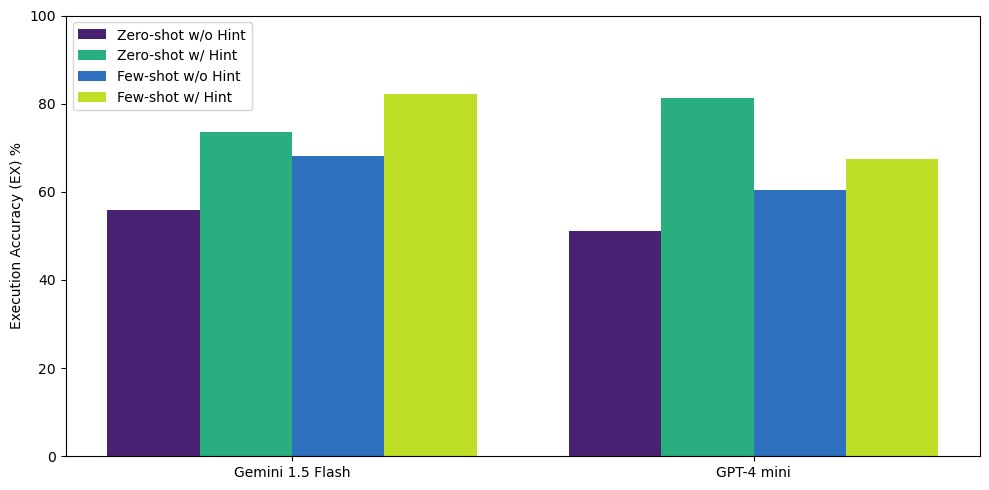

In [119]:
models = ['Gemini 1.5 Flash', 'GPT-4 mini']
conditions = ['Zero-shot w/o Hint', 'Zero-shot w/ Hint', 'Few-shot w/o Hint', 'Few-shot w/ Hint']

data = np.array([
    [df.loc[0, 'EX_by_diff_total'], df.loc[2, 'EX_by_diff_total'], df.loc[4, 'EX_by_diff_total'], df.loc[6, 'EX_by_diff_total']],  # Gemini
    [df.loc[1, 'EX_by_diff_total'], df.loc[3, 'EX_by_diff_total'], df.loc[5, 'EX_by_diff_total'], df.loc[7, 'EX_by_diff_total']],  # GPT-4 mini
])

colors = ['#482173', '#29af7f', '#2e6fbe', '#bddf26']

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Ancho de las barras y posiciones
bar_width = 0.2  # Hacer las barras más estrechas para que quepan mejor
index = np.arange(len(models))  # Indices para las etiquetas en el eje x

for i in range(len(conditions)):
    ax.bar(index + i * bar_width - bar_width /2, data[:, i], bar_width, label=conditions[i], color=colors[i % len(colors)])  # Utilizar el operador módulo para asegurarse de que el índice esté dentro del rango


# Añadir anotaciones de porcentaje encima de las barras
#for i in range(len(conditions)):
#    for j in range(len(models)):
#        ax.annotate(f"{data[j, i]:.2f}%", 
#                    (index[j] + i * bar_width - bar_width / 2, data[j, i] + 1), 
#                    ha='center', va='bottom', fontsize=9)

# Configuración de etiquetas y leyenda
ax.set_ylabel('Execution Accuracy (EX) %')
#ax.set_title('Execution Accuracy by Model and Condition')
#ax.set_xticks(index)  # Centrar etiquetas de modelos
ax.set_xticks(index + bar_width) # * (len(conditions) - 1) / 2)  # Centrar etiquetas de modelos
ax.set_xticklabels(models)

# Añadir leyenda
ax.legend(loc='upper left')

# Ajustar el límite del eje y
ax.set_ylim(0, 100)

# Ajustar los márgenes para que el gráfico no se corte
plt.tight_layout()

plt.savefig('imagen/ex_total.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()


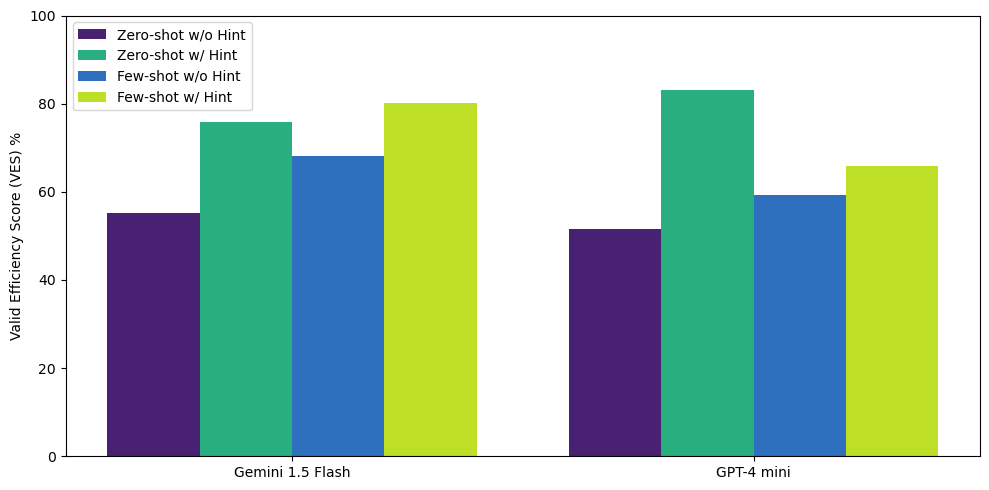

In [120]:
models = ['Gemini 1.5 Flash', 'GPT-4 mini']
conditions = ['Zero-shot w/o Hint', 'Zero-shot w/ Hint', 'Few-shot w/o Hint', 'Few-shot w/ Hint']

data = np.array([
    [df.loc[0, 'VES'], df.loc[2, 'VES'], df.loc[4, 'VES'], df.loc[6, 'VES']],  # Gemini
    [df.loc[1, 'VES'], df.loc[3, 'VES'], df.loc[5, 'VES'], df.loc[7, 'VES']],  # GPT-4 mini
])

colors = ['#482173', '#29af7f', '#2e6fbe', '#bddf26']

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Ancho de las barras y posiciones
bar_width = 0.2  # Hacer las barras más estrechas para que quepan mejor
index = np.arange(len(models))  # Indices para las etiquetas en el eje x

for i in range(len(conditions)):
    ax.bar(index + i * bar_width - bar_width /2, data[:, i], bar_width, label=conditions[i], color=colors[i % len(colors)])  # Utilizar el operador módulo para asegurarse de que el índice esté dentro del rango


# Añadir anotaciones de porcentaje encima de las barras
#for i in range(len(conditions)):
#    for j in range(len(models)):
#        ax.annotate(f"{data[j, i]:.2f}%", 
#                    (index[j] + i * bar_width - bar_width / 2, data[j, i] + 1), 
#                    ha='center', va='bottom', fontsize=9)

# Configuración de etiquetas y leyenda
ax.set_ylabel('Valid Efficiency Score (VES) %')
#ax.set_title('Execution Accuracy by Model and Condition')
#ax.set_xticks(index)  # Centrar etiquetas de modelos
ax.set_xticks(index + bar_width) # * (len(conditions) - 1) / 2)  # Centrar etiquetas de modelos
ax.set_xticklabels(models)

# Añadir leyenda
ax.legend(loc='upper left')

# Ajustar el límite del eje y
ax.set_ylim(0, 100)

# Ajustar los márgenes para que el gráfico no se corte
plt.tight_layout()

plt.savefig('imagen/ves_total.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()